In [1]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates 


In [2]:
#obtenemos los datos con la libreria de yfinance
sp500= yf.Ticker("^GSPC").history( period = "10y")

In [3]:
sp500 = sp500.drop( columns= ["Dividends" , 'Stock Splits'] )



In [4]:
sp500['Date'] = sp500.index
sp500['Date'] = pd.to_datetime(sp500['Date']).dt.strftime('%Y-%m-%d')

# Convertir la columna 'fecha' a tipo datetime
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Separar la columna en año, mes y día
sp500['año'] = sp500['Date'].dt.year
sp500['mes'] = sp500['Date'].dt.month
sp500['día'] = sp500['Date'].dt.day

In [5]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-09-15 00:00:00-04:00 to 2024-09-13 00:00:00-04:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Open    2517 non-null   float64       
 1   High    2517 non-null   float64       
 2   Low     2517 non-null   float64       
 3   Close   2517 non-null   float64       
 4   Volume  2517 non-null   int64         
 5   Date    2517 non-null   datetime64[ns]
 6   año     2517 non-null   int32         
 7   mes     2517 non-null   int32         
 8   día     2517 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1)
memory usage: 167.1 KB


In [6]:
sp500.head(10)

,Open,High,Low,Close,Volume,Date,año,mes,día
Date,,,,,,,,,
2014-09-15 00:00:00-04:00,1986.040039,1987.180054,1978.479980,1984.130005,2776530000,2014-09-15,2014,9,15
2014-09-16 00:00:00-04:00,1981.930054,2002.280029,1979.060059,1998.979980,3160310000,2014-09-16,2014,9,16
2014-09-17 00:00:00-04:00,1999.300049,2010.739990,1993.290039,2001.569946,3209420000,2014-09-17,2014,9,17
2014-09-18 00:00:00-04:00,2003.069946,2012.339966,2003.069946,2011.359985,3235340000,2014-09-18,2014,9,18
2014-09-19 00:00:00-04:00,2012.739990,2019.260010,2006.589966,2010.400024,4880220000,2014-09-19,2014,9,19
2014-09-22 00:00:00-04:00,2009.079956,2009.079956,1991.010010,1994.290039,3349670000,2014-09-22,2014,9,22
2014-09-23 00:00:00-04:00,1992.780029,1995.410034,1982.770020,1982.770020,3279350000,2014-09-23,2014,9,23
2014-09-24 00:00:00-04:00,1983.339966,1999.790039,1978.630005,1998.300049,3313850000,2014-09-24,2014,9,24
2014-09-25 00:00:00-04:00,1997.319946,1997.319946,1965.989990,1965.989990,3273050000,2014-09-25,2014,9,25


# Graficos de lineas


<function matplotlib.pyplot.show(close=None, block=None)>

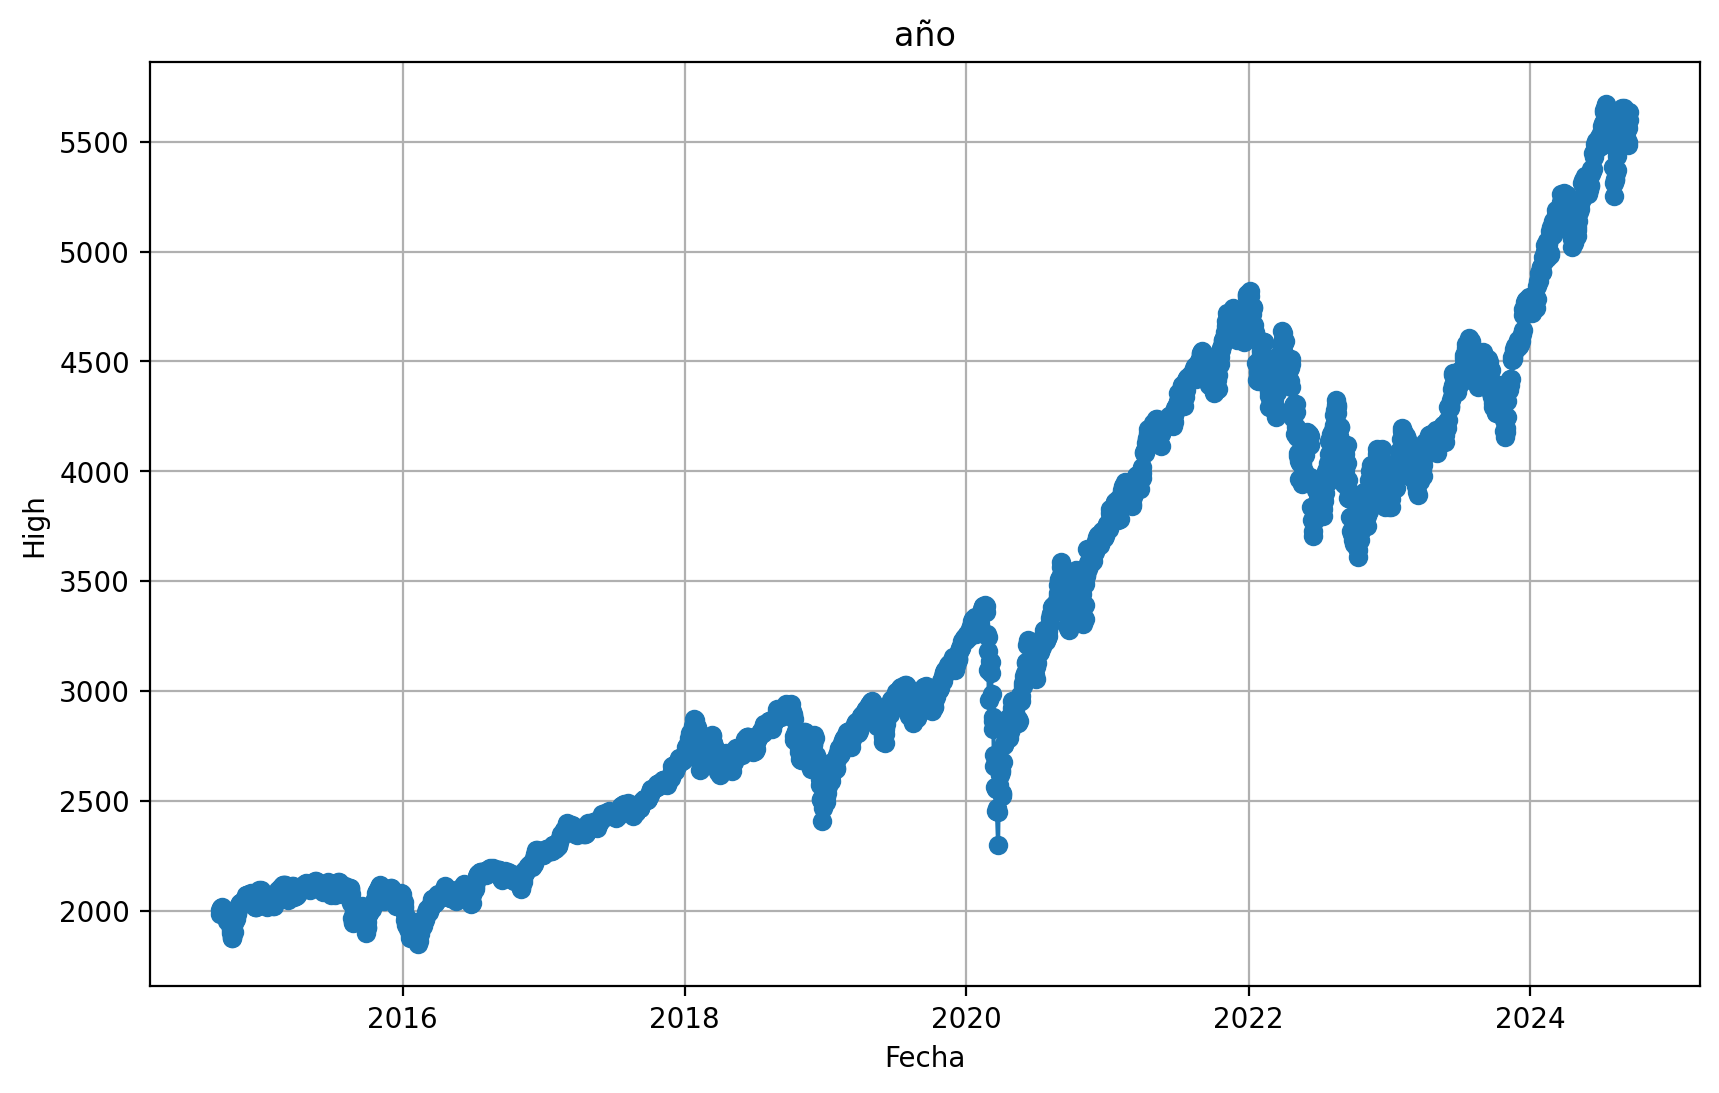

In [7]:
plt.figure(figsize=(10, 6  ))
plt.plot(sp500['Date'] , sp500["High"], marker='o')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Mostrar una fecha cada 2 años
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('año')
plt.xlabel('Fecha')
plt.ylabel('High')
plt.grid(True)

plt.show

In [8]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
tables = pd.read_html(url)


In [9]:
sp500_symbols = tables[0]

In [10]:

sp500_symbols = sp500_symbols['Symbol'].tolist()

In [32]:

sp500_data = pd.DataFrame()


for symbol in sp500_symbols:
    print(f"Descargando datos para {symbol}...")
    data = yf.Ticker(symbol).history( period = "10y")
    if len(data) > 0:
        data['Symbol'] = symbol
        sp500_data = pd.concat([sp500_data, data])

Descargando datos para MMM...
Descargando datos para AOS...
Descargando datos para ABT...
Descargando datos para ABBV...
Descargando datos para ACN...
Descargando datos para ADBE...
Descargando datos para AMD...
Descargando datos para AES...
Descargando datos para AFL...
Descargando datos para A...
Descargando datos para APD...


ABNB: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']


Descargando datos para ABNB...
Descargando datos para AKAM...
Descargando datos para ALB...
Descargando datos para ARE...
Descargando datos para ALGN...
Descargando datos para ALLE...
Descargando datos para LNT...
Descargando datos para ALL...
Descargando datos para GOOGL...
Descargando datos para GOOG...
Descargando datos para MO...
Descargando datos para AMZN...
Descargando datos para AMCR...
Descargando datos para AEE...
Descargando datos para AAL...
Descargando datos para AEP...
Descargando datos para AXP...
Descargando datos para AIG...
Descargando datos para AMT...
Descargando datos para AWK...
Descargando datos para AMP...
Descargando datos para AME...
Descargando datos para AMGN...
Descargando datos para APH...
Descargando datos para ADI...
Descargando datos para ANSS...
Descargando datos para AON...
Descargando datos para APA...
Descargando datos para AAPL...
Descargando datos para AMAT...
Descargando datos para APTV...
Descargando datos para ACGL...
Descargando datos para ADM

BRK.B: No data found, symbol may be delisted


Descargando datos para BBY...
Descargando datos para BIO...
Descargando datos para TECH...
Descargando datos para BIIB...
Descargando datos para BLK...
Descargando datos para BX...
Descargando datos para BA...
Descargando datos para BKNG...
Descargando datos para BWA...
Descargando datos para BSX...
Descargando datos para BMY...
Descargando datos para AVGO...
Descargando datos para BR...
Descargando datos para BRO...


$BF.B: possibly delisted; No price data found  (period=10y)


Descargando datos para BF.B...
$BF.B: possibly delisted; No price data found  (period=10y)
Descargando datos para BLDR...
Descargando datos para BG...
Descargando datos para BXP...
Descargando datos para CHRW...
Descargando datos para CDNS...
Descargando datos para CZR...
Descargando datos para CPT...
Descargando datos para CPB...
Descargando datos para COF...
Descargando datos para CAH...
Descargando datos para KMX...
Descargando datos para CCL...


CARR: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']


Descargando datos para CARR...
Descargando datos para CTLT...
Descargando datos para CAT...
Descargando datos para CBOE...
Descargando datos para CBRE...
Descargando datos para CDW...
Descargando datos para CE...
Descargando datos para COR...
Descargando datos para CNC...
Descargando datos para CNP...
Descargando datos para CF...
Descargando datos para CRL...
Descargando datos para SCHW...
Descargando datos para CHTR...
Descargando datos para CVX...
Descargando datos para CMG...
Descargando datos para CB...
Descargando datos para CHD...
Descargando datos para CI...
Descargando datos para CINF...
Descargando datos para CTAS...
Descargando datos para CSCO...
Descargando datos para C...
Descargando datos para CFG...
Descargando datos para CLX...
Descargando datos para CME...
Descargando datos para CMS...
Descargando datos para KO...
Descargando datos para CTSH...
Descargando datos para CL...
Descargando datos para CMCSA...
Descargando datos para CAG...
Descargando datos para COP...
Descar

CEG: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']


Descargando datos para CEG...
Descargando datos para COO...
Descargando datos para CPRT...
Descargando datos para GLW...
Descargando datos para CPAY...
Descargando datos para CTVA...
Descargando datos para CSGP...
Descargando datos para COST...
Descargando datos para CTRA...
Descargando datos para CRWD...
Descargando datos para CCI...
Descargando datos para CSX...
Descargando datos para CMI...
Descargando datos para CVS...
Descargando datos para DHR...
Descargando datos para DRI...
Descargando datos para DVA...
Descargando datos para DAY...
Descargando datos para DECK...
Descargando datos para DE...
Descargando datos para DAL...
Descargando datos para DVN...
Descargando datos para DXCM...
Descargando datos para FANG...
Descargando datos para DLR...
Descargando datos para DFS...
Descargando datos para DG...
Descargando datos para DLTR...
Descargando datos para D...
Descargando datos para DPZ...
Descargando datos para DOV...
Descargando datos para DOW...
Descargando datos para DHI...
Des

GEHC: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Descargando datos para GEHC...
Descargando datos para GEV...


GEV: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']


Descargando datos para GEN...
Descargando datos para GNRC...
Descargando datos para GD...
Descargando datos para GIS...
Descargando datos para GM...
Descargando datos para GPC...
Descargando datos para GILD...
Descargando datos para GPN...
Descargando datos para GL...
Descargando datos para GDDY...
Descargando datos para GS...
Descargando datos para HAL...
Descargando datos para HIG...
Descargando datos para HAS...
Descargando datos para HCA...
Descargando datos para DOC...
Descargando datos para HSIC...
Descargando datos para HSY...
Descargando datos para HES...
Descargando datos para HPE...
Descargando datos para HLT...
Descargando datos para HOLX...
Descargando datos para HD...
Descargando datos para HON...
Descargando datos para HRL...
Descargando datos para HST...
Descargando datos para HWM...
Descargando datos para HPQ...
Descargando datos para HUBB...
Descargando datos para HUM...
Descargando datos para HBAN...
Descargando datos para HII...
Descargando datos para IBM...
Descarga

KVUE: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', 'ytd', 'max']


Descargando datos para KVUE...
Descargando datos para KDP...
Descargando datos para KEY...
Descargando datos para KEYS...
Descargando datos para KMB...
Descargando datos para KIM...
Descargando datos para KMI...
Descargando datos para KKR...
Descargando datos para KLAC...
Descargando datos para KHC...
Descargando datos para KR...
Descargando datos para LHX...
Descargando datos para LH...
Descargando datos para LRCX...
Descargando datos para LW...
Descargando datos para LVS...
Descargando datos para LDOS...
Descargando datos para LEN...
Descargando datos para LLY...
Descargando datos para LIN...
Descargando datos para LYV...
Descargando datos para LKQ...
Descargando datos para LMT...
Descargando datos para L...
Descargando datos para LOW...
Descargando datos para LULU...
Descargando datos para LYB...
Descargando datos para MTB...
Descargando datos para MRO...
Descargando datos para MPC...
Descargando datos para MKTX...
Descargando datos para MAR...
Descargando datos para MMC...
Descarga

OTIS: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', 'ytd', 'max']


Descargando datos para OTIS...
Descargando datos para PCAR...
Descargando datos para PKG...
Descargando datos para PANW...
Descargando datos para PARA...
Descargando datos para PH...
Descargando datos para PAYX...
Descargando datos para PAYC...
Descargando datos para PYPL...
Descargando datos para PNR...
Descargando datos para PEP...
Descargando datos para PFE...
Descargando datos para PCG...
Descargando datos para PM...
Descargando datos para PSX...
Descargando datos para PNW...
Descargando datos para PNC...
Descargando datos para POOL...
Descargando datos para PPG...
Descargando datos para PPL...
Descargando datos para PFG...
Descargando datos para PG...
Descargando datos para PGR...
Descargando datos para PLD...
Descargando datos para PRU...
Descargando datos para PEG...
Descargando datos para PTC...
Descargando datos para PSA...
Descargando datos para PHM...
Descargando datos para QRVO...
Descargando datos para PWR...
Descargando datos para QCOM...
Descargando datos para DGX...
Des

SW: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', 'ytd', 'max']


Descargando datos para SW...
Descargando datos para SNA...


SOLV: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', 'ytd', 'max']


Descargando datos para SOLV...
Descargando datos para SO...
Descargando datos para LUV...
Descargando datos para SWK...
Descargando datos para SBUX...
Descargando datos para STT...
Descargando datos para STLD...
Descargando datos para STE...
Descargando datos para SYK...
Descargando datos para SMCI...
Descargando datos para SYF...
Descargando datos para SNPS...
Descargando datos para SYY...
Descargando datos para TMUS...
Descargando datos para TROW...
Descargando datos para TTWO...
Descargando datos para TPR...
Descargando datos para TRGP...
Descargando datos para TGT...
Descargando datos para TEL...
Descargando datos para TDY...
Descargando datos para TFX...
Descargando datos para TER...
Descargando datos para TSLA...
Descargando datos para TXN...
Descargando datos para TXT...
Descargando datos para TMO...
Descargando datos para TJX...
Descargando datos para TSCO...
Descargando datos para TT...
Descargando datos para TDG...
Descargando datos para TRV...
Descargando datos para TRMB...


VLTO: Period '10y' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', 'ytd', 'max']


Descargando datos para VLTO...
Descargando datos para VRSN...
Descargando datos para VRSK...
Descargando datos para VZ...
Descargando datos para VRTX...
Descargando datos para VTRS...
Descargando datos para VICI...
Descargando datos para V...
Descargando datos para VST...
Descargando datos para VMC...
Descargando datos para WRB...
Descargando datos para GWW...
Descargando datos para WAB...
Descargando datos para WBA...
Descargando datos para WMT...
Descargando datos para DIS...
Descargando datos para WBD...
Descargando datos para WM...
Descargando datos para WAT...
Descargando datos para WEC...
Descargando datos para WFC...
Descargando datos para WELL...
Descargando datos para WST...
Descargando datos para WDC...
Descargando datos para WY...
Descargando datos para WMB...
Descargando datos para WTW...
Descargando datos para WYNN...
Descargando datos para XEL...
Descargando datos para XYL...
Descargando datos para YUM...
Descargando datos para ZBRA...
Descargando datos para ZBH...
Descar

In [33]:
sp500_data['Date'] = sp500_data.index
sp500_data['Date'] = pd.to_datetime(sp500_data['Date']).dt.strftime('%Y-%m-%d')

# Convertir la columna 'fecha' a tipo datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Separar la columna en año, mes y día
sp500_data['año'] = sp500_data['Date'].dt.year
sp500_data['mes'] = sp500_data['Date'].dt.month
sp500_data['día'] = ['Date'].dt.day

In [41]:
sp500_data = sp500_data.rename(columns={"Old_Date": "Date_time"})  # Renombrar la columna "Date"
sp500_data = sp500_data.reset_index()  # Reinicia el índice


In [35]:

def get_candle_type(price):
    if pd.isna(price["Close"]) or pd.isna(price["Open"]):
        return "undefined"  # Manejar valores NaN
    if price["Close"] > price["Open"]:
        return "bullish"
    elif price["Close"] < price["Open"]:
        return "bearish"
    return "undefined"



def adjust_candle_delta(row):
    type_ = row.get("Type", "undefined") 
    delta = row.get("Delta", None)  
    if delta is None:
        return None  
    if type_ == "bullish":
        return delta  
    elif type_ == "bearish":
        return -delta  

    return None  # Si el tipo es 'undefined', devuelve None

In [36]:
sp500_data["Type"]  = sp500_data.apply(lambda row: get_candle_type(row), axis=1)
sp500_data["Delta"] = sp500_data.apply(lambda row: adjust_candle_delta(row), axis=1)

In [37]:
sp500_data = sp500_data.drop( columns= ["Dividends" , 'Stock Splits', 'index','Date'] )

In [39]:
sp500_data['DayOfWeek'] = sp500_data['Date'].dt.day_name()

In [42]:
sp500_data

,index,Date,Open,High,Low,Close,Volume,Symbol,Date_time,año,mes,día,Type,Delta,DayOfWeek
0,0,2014-09-15 00:00:00-04:00,86.047082,86.357443,85.742691,86.232101,2234128,MMM,2014-09-15,2014,9,15,bullish,None,Monday
1,1,2014-09-16 00:00:00-04:00,85.826251,86.536493,85.700909,86.452934,2326340,MMM,2014-09-16,2014,9,16,bullish,None,Tuesday
2,2,2014-09-17 00:00:00-04:00,86.494690,87.013944,86.106740,86.763268,3297372,MMM,2014-09-17,2014,9,17,bullish,None,Wednesday
3,3,2014-09-18 00:00:00-04:00,86.960244,87.771958,86.954281,87.640648,2828301,MMM,2014-09-18,2014,9,18,bullish,None,Thursday
4,4,2014-09-19 00:00:00-04:00,87.986805,88.255383,87.449644,87.551109,9695015,MMM,2014-09-19,2014,9,19,bearish,None,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219180,1219180,2024-09-09 00:00:00-04:00,190.550003,193.610001,190.089996,191.729996,2652700,ZTS,2024-09-09,2024,9,9,bullish,None,Monday
1219181,1219181,2024-09-10 00:00:00-04:00,191.729996,192.770004,187.820007,191.360001,2675600,ZTS,2024-09-10,2024,9,10,bearish,None,Tuesday
1219182,1219182,2024-09-11 00:00:00-04:00,190.710007,191.149994,186.440002,189.990005,1387900,ZTS,2024-09-11,2024,9,11,bearish,None,Wednesday
1219183,1219183,2024-09-12 00:00:00-04:00,189.979996,190.869995,187.139999,190.710007,1046000,ZTS,2024-09-12,2024,9,12,bullish,None,Thursday
